# Stock Predictor for Apple stock (APPL)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import keras
%matplotlib inline

Using Theano backend.


In [5]:
prices_dataset =  pd.read_csv('AAPL.csv', header=0)
prices_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/7/2009,20.178572,20.404285,19.969999,140.020004,18.066357,92619800
1,6/7/2009,19.814285,19.855715,19.464285,138.610001,17.884430,124672100
2,7/7/2009,19.782858,19.954287,19.311428,135.399994,17.470257,115399200
3,8/7/2009,19.417143,19.719999,19.202858,137.220001,17.705082,143982300
4,9/7/2009,19.680000,19.712856,19.418571,136.360001,17.594120,85756300


In [ ]:
prices_dataset.isnull().any().any()  #Check if there are any NaN values

In [6]:
prices_dataset = prices_dataset.drop(['Open','High','Low'], axis = 1)
prices_dataset.tail()

,Date,Close,Adj Close,Volume
2009,26/6/2017,145.820007,145.820007,25692400
2010,27/6/2017,143.729996,143.729996,24761900
2011,28/6/2017,145.830002,145.830002,22082400
2012,29/6/2017,143.679993,143.679993,31293800
2013,30/6/2017,144.020004,144.020004,23024107


Calculate a 5 day rolling mean to cancel out noise.    

In [7]:
#pd.rolling_mean(prices_dataset['Adj Close'], 5)
prices_dataset['AdjClose_ma'] = prices_dataset['Adj Close'].rolling(window=5,center=False).mean() #cancel out noise
prices_dataset.tail()

,Date,Close,Adj Close,Volume,AdjClose_ma
2009,26/6/2017,145.820007,145.820007,25692400,145.722000
2010,27/6/2017,143.729996,143.729996,24761900,145.466000
2011,28/6/2017,145.830002,145.830002,22082400,145.458002
2012,29/6/2017,143.679993,143.679993,31293800,145.067999
2013,30/6/2017,144.020004,144.020004,23024107,144.616000


In [8]:
daily_returns = prices_dataset['Adj Close'].pct_change(1) # 1 for ONE DAY lookback
prices_dataset['daily_returns'] = daily_returns+1.0 #we want pct change!!
prices_dataset.tail()

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns
2009,26/6/2017,145.820007,145.820007,25692400,145.722000,0.996855
2010,27/6/2017,143.729996,143.729996,24761900,145.466000,0.985667
2011,28/6/2017,145.830002,145.830002,22082400,145.458002,1.014611
2012,29/6/2017,143.679993,143.679993,31293800,145.067999,0.985257
2013,30/6/2017,144.020004,144.020004,23024107,144.616000,1.002366


In [12]:
#calculate MACD. This shall be one of our features.
EWMA26 = prices_dataset['Adj Close'].ewm(ignore_na=False,span=26,min_periods=26,adjust=True).mean()
EWMA12 = prices_dataset['Adj Close'].ewm(ignore_na=False,span=12,min_periods=12,adjust=True).mean()
prices_dataset['MACD'] = EWMA12 - EWMA26
prices_dataset.tail()

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD
2009,26/6/2017,145.820007,145.820007,25692400,145.722000,0.996855,-1.469609
2010,27/6/2017,143.729996,143.729996,24761900,145.466000,0.985667,-1.600505
2011,28/6/2017,145.830002,145.830002,22082400,145.458002,1.014611,-1.517297
2012,29/6/2017,143.679993,143.679993,31293800,145.067999,0.985257,-1.606325
2013,30/6/2017,144.020004,144.020004,23024107,144.616000,1.002366,-1.630647


In [13]:
#Calculate AdjClose/moving average. This shall be one of our features
prices_dataset['AdjClose_to_ma'] = prices_dataset['Adj Close']/prices_dataset['AdjClose_ma']
prices_dataset[0:30]

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD,AdjClose_to_ma
0,2/7/2009,140.020004,18.066357,92619800,NaN,NaN,NaN,NaN
1,6/7/2009,138.610001,17.884430,124672100,NaN,0.989930,NaN,NaN
2,7/7/2009,135.399994,17.470257,115399200,NaN,0.976842,NaN,NaN
3,8/7/2009,137.220001,17.705082,143982300,NaN,1.013441,NaN,NaN
4,9/7/2009,136.360001,17.594120,85756300,17.744049,0.993733,NaN,0.991550
5,10/7/2009,138.520004,17.872822,111318900,17.705342,1.015841,NaN,1.009459
6,13/7/2009,142.339996,18.365702,120875300,17.801597,1.027577,NaN,1.031688
7,14/7/2009,142.270004,18.356665,86811900,17.978878,0.999508,NaN,1.021013
8,15/7/2009,146.880005,18.951488,121396800,18.228159,1.032404,NaN,1.039682
9,16/7/2009,147.520004,19.034061,98392700,18.516148,1.004357,NaN,1.027971


In [14]:
PE_ratio =  pd.read_csv('APPL_Price_to_Earnings.csv', header=0)
#PE_ratio

In [15]:
from datetime import datetime as dt
#assing P/E ratio to each date within the quarter
PE = pd.Series(data = 0.0, index = prices_dataset.index, dtype = float)

for inx in range(len(prices_dataset.index)):
    for jnx in range(len(PE_ratio.index)): 
        if dt.strptime(prices_dataset['Date'][inx], "%d/%m/%Y")>dt.strptime(PE_ratio['Dates'][jnx], "%d/%m/%Y"):
            PE[inx] = PE_ratio['Price to Earnings'][jnx]

In [16]:
prices_dataset['PE'] = PE

In [17]:
APPL_df = prices_dataset.dropna(axis=0, how='any')
APPL_df = (APPL_df.reset_index()).drop('index',axis = 1)
APPL_df

,Date,Close,Adj Close,Volume,AdjClose_ma,daily_returns,MACD,AdjClose_to_ma,PE
0,7/8/2009,165.509995,21.355257,96838700,21.328419,1.009761,0.499441,1.001258,16.22
1,10/8/2009,164.720001,21.253325,75073600,21.284292,0.995227,0.483160,0.998545,16.22
2,11/8/2009,162.830002,21.009460,88835600,21.214100,0.988526,0.447396,0.990354,16.22
3,12/8/2009,165.309998,21.329453,111267800,21.219262,1.015231,0.437357,1.005193,16.22
4,13/8/2009,168.419998,21.730726,109995200,21.335644,1.018813,0.453587,1.018517,16.22
5,14/8/2009,166.779999,21.519119,76454000,21.368417,0.990262,0.445532,1.007053,16.22
6,17/8/2009,159.589996,20.591417,131095300,21.236035,0.956889,0.365796,0.969645,16.22
7,18/8/2009,164.000000,21.160429,107788100,21.266229,1.027633,0.341384,0.995025,16.22
8,19/8/2009,164.600006,21.237843,103317900,21.247907,1.003658,0.324122,0.999526,16.22
9,20/8/2009,166.330002,21.461061,85507800,21.193974,1.010510,0.323594,1.012602,16.22


In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
def normalize_data(df):
    df['MACD'] = min_max_scaler.fit_transform(df.MACD.values.reshape(-1,1))
    df['AdjClose_to_ma'] = min_max_scaler.fit_transform(df.AdjClose_to_ma.values.reshape(-1,1))
    df['PE'] = min_max_scaler.fit_transform(df.PE.values.reshape(-1,1))
    df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
    return df
APPL_df = APPL_df[['MACD','AdjClose_to_ma','PE','Adj Close']].copy()
df = normalize_data(APPL_df)
df.head()

,MACD,AdjClose_to_ma,PE,Adj Close
0,0.520229,0.587096,0.601332,0.005637
1,0.518406,0.569405,0.601332,0.004885
2,0.514402,0.515992,0.601332,0.003085
3,0.513278,0.612753,0.601332,0.005446
4,0.515095,0.699635,0.601332,0.008408


In [19]:
def load_data(stock, seq_len=10):
    amount_of_features = len(stock.columns) # 4
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 10days
    
    result = np.array(result)
    row = round(0.7 * result.shape[0]) # 70% split
    train = result[:int(row), :] # 70% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [20]:
X_train, y_train, X_test, y_test = load_data(df)
print (X_train[0], y_train[0])

(array([[ 0.52022867,  0.58709635,  0.60133206,  0.00563684],
       [ 0.51840603,  0.5694046 ,  0.60133206,  0.00488462],
       [ 0.5144023 ,  0.51599153,  0.60133206,  0.00308499],
       [ 0.51327836,  0.61275251,  0.60133206,  0.00544641],
       [ 0.51509539,  0.69963521,  0.60133206,  0.00840765],
       [ 0.51419364,  0.62487802,  0.60133206,  0.00684608],
       [ 0.50526721,  0.38096101,  0.60133206,  0.        ],
       [ 0.50253422,  0.54645164,  0.60133206,  0.00419908],
       [ 0.50060181,  0.57580305,  0.60133206,  0.00477037],
       [ 0.50054266,  0.66106349,  0.60133206,  0.00641763]]), 0.0091694335331024834)


In [22]:
#remove the last column since it is the output that we want to predict
new_X_train = np.empty([1385,10,3])
for i in range(1385):
    for j in range(10):
        new_row = np.delete(X_train[i][j],3)
        new_X_train[i][j] = new_row
        
print new_X_train[0][0]

[ 0.52022867  0.58709635  0.60133206]


In [23]:
new_X_test = np.empty([593,10,3])
#new_X_train = np.reshape(new_X_train,(1385,10,3))
for i in range(593):
    for j in range(10):
        new_row = np.delete(X_test[i][j],3)
        new_X_test[i][j] = new_row
        
print new_X_test[0][0]

[ 0.73351696  0.60883586  0.51665081]


In [48]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras

In [49]:
d=0.2
model = Sequential()
model.add(LSTM(128, input_shape= (10,3), return_sequences=True))
model.add(Dropout(d))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(d))

model.add(Dense(16, kernel_initializer="uniform",activation='relu'))
model.add(Dense(1, kernel_initializer="uniform",activation='relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

('compilation time : ', 0.04800009727478027)


In [50]:
start = time.time()
model.fit(new_X_train,y_train,batch_size=128,epochs=90,validation_split=0.1,verbose=1)
print ('compilation time : ', time.time() - start)

Train on 1246 samples, validate on 139 samples
Epoch 1/90
1246/1246 [==============================] - 2s - loss: 0.0465 - val_loss: 0.1197
Epoch 2/90
1246/1246 [==============================] - 3s - loss: 0.0196 - val_loss: 0.0886
Epoch 3/90
1246/1246 [==============================] - 2s - loss: 0.0129 - val_loss: 0.1027
Epoch 4/90
1246/1246 [==============================] - 3s - loss: 0.0096 - val_loss: 0.1221
Epoch 5/90
1246/1246 [==============================] - 3s - loss: 0.0097 - val_loss: 0.1053
Epoch 6/90
1246/1246 [==============================] - 3s - loss: 0.0098 - val_loss: 0.0830
Epoch 7/90
1246/1246 [==============================] - 3s - loss: 0.0093 - val_loss: 0.1302
Epoch 8/90
1246/1246 [==============================] - 3s - loss: 0.0085 - val_loss: 0.1326
Epoch 9/90
1246/1246 [==============================] - 3s - loss: 0.0089 - val_loss: 0.0900
Epoch 10/90
1246/1246 [==============================] - 2s - loss: 0.0081 - val_loss: 0.1051
Epoch 11/90
1246/1246 

In [71]:
pred = model.predict(new_X_test)
print (pred.shape)

(593L, 1L)


In [57]:
import math
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    return trainScore, testScore


model_score(model, new_X_train, y_train, new_X_test, y_test)

Train Score: 0.01034 MSE (0.10 RMSE)
Test Score: 0.16621 MSE (0.41 RMSE)


(0.010339734715238106, 0.1662102262246066)

In [59]:
from sklearn.metrics import mean_squared_error as msq
msq(y_test,pred)

0.16621022466935634

In [74]:
Predictions = min_max_scaler.inverse_transform(pred)
Actual = min_max_scaler.inverse_transform(y_test)

C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


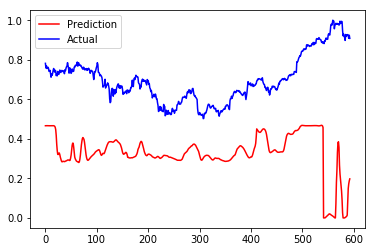

In [75]:
import matplotlib.pyplot as plt2

plt2.plot(Predictions,color='red', label='Prediction')
plt2.plot(Actual,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [37]:
nx, ny, nz =  new_X_train.shape
X_train_dataset = new_X_train.reshape((nx,ny*nz))

In [38]:
from sklearn.svm import SVR
clf = SVR(C=1.0, kernel='rbf', degree=2, epsilon=0.2)
clf.fit(X_train_dataset, y_train) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
nx1, ny1, nz1 =  new_X_test.shape
X_test_dataset = new_X_test.reshape((nx1,ny1*nz1))
y_predicted = clf.predict(X_test_dataset)

In [44]:
y_predicted= min_max_scaler.inverse_transform(y_predicted)

C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


C:\Users\User\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


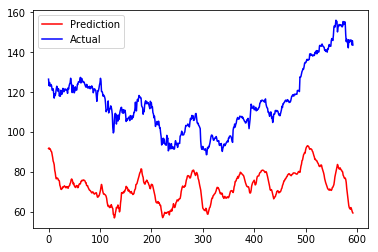

In [47]:
import matplotlib.pyplot as plt2
Actual = min_max_scaler.inverse_transform(y_test)
plt2.plot(y_predicted,color='red', label='Prediction')
plt2.plot(Actual,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()